In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np

### Functions

In [2]:
def permuteRows(X, l):
    Nsamples = X.shape[0]
    randidx = np.random.permutation(Nsamples)
    
    Xp = X[randidx,:]
    lp = l[randidx]
    
    return Xp, lp

def divideTrainTest(Xp, lp):
    Nsamples = Xp.shape[0]
    train_samples = int(np.ceil(0.8*Nsamples))
    
    X_train = Xp[0:train_samples, :]
    X_test  = Xp[train_samples:, :]
    
    l_train = lp[0:train_samples]
    l_test  = lp[train_samples:]
    
    return X_train, X_test, l_train, l_test

def crossvalidation(clf, X, l, NRUNS):
    score = np.zeros((NRUNS,))
    for n in np.arange(NRUNS):
        Xp, lp = permuteRows(X, l)
        X_train, X_test, l_train, l_test= divideTrainTest(Xp, lp)    
        clf.fit(X_train, l_train)
        score[n] = clf.score(X_test, l_test)
    return score

## First exercise

### Load and preprocess data

In [3]:
# load data from file
data = np.genfromtxt('dermatology.data', delimiter=',')

print data.shape

# separate label from data
X = data[:,0:34] # data
l = data[:,34]   # labels

print X.shape, l.shape

# standardize data
Nfeatures = X.shape[1]
for n in np.arange(Nfeatures):
    X[:,n] = (X[:,n] - X[:,n].mean())/(X[:,n].std())

(358, 35)
(358, 34) (358,)


### Learning stage

In [4]:
from sklearn import lda
from sklearn import linear_model
from sklearn import svm

# Define classifiers        
clf_lda = lda.LDA()   
clf_perceptron = linear_model.Perceptron()
clf_svm = svm.SVC()

# Cross validation stage
NRUNS = 1000
lda_accuracy = crossvalidation(clf_lda, X, l, NRUNS)
perceptron_accuracy = crossvalidation(clf_perceptron, X, l, NRUNS)
svm_accuracy = crossvalidation(clf_svm, X, l, NRUNS)

# Print classifiers accuracy
methods_list = ['LDA', 'Perceptron', 'SVM']
accuracy_list = [lda_accuracy, perceptron_accuracy, svm_accuracy]
for method, accuracy in zip(methods_list, accuracy_list):
    print '{} mean accuracy {}'.format(method, accuracy.mean())
    print '{} accuracy std {}'.format(method, accuracy.std())
    print '{} min accuracy {}'.format(method, accuracy.min())
    print '{} max accuracy {}'.format(method, accuracy.max())
    print

LDA mean accuracy 0.965478873239
LDA accuracy std 0.0219627960839
LDA min accuracy 0.887323943662
LDA max accuracy 1.0

Perceptron mean accuracy 0.95976056338
Perceptron accuracy std 0.022947595613
Perceptron min accuracy 0.87323943662
Perceptron max accuracy 1.0

SVM mean accuracy 0.972746478873
SVM accuracy std 0.0169645241708
SVM min accuracy 0.915492957746
SVM max accuracy 1.0



## Second exercise

### Load data

In [5]:
x_train = np.loadtxt('06_Assignment_data/data-input-learning.txt')
t_train = np.loadtxt('06_Assignment_data/data-output-learning.txt')
x_test = np.loadtxt('06_Assignment_data/data-input-testing.txt')
t_test = np.loadtxt('06_Assignment_data/data-output-testing.txt')

print x_train.shape, t_train.shape, x_test.shape, t_test.shape

(3000, 5) (3000,) (1000, 5) (1000,)


In [6]:
from sklearn import svm
from sklearn import gaussian_process
from sklearn import linear_model


clf_gpr = gaussian_process.GaussianProcess(nugget=2)
clf_blr = linear_model.BayesianRidge()
clf_svr = svm.SVR()

In [7]:
clf_svr.fit(x_train, t_train)
y_svr_test = clf_svr.predict(x_test)
print y_svr_test


[-1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721
 -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.7300721  -1.

[svr] accuracy score: -1.37660243427e-07
[svr] MSE: 23106.1744582
[gpr] accuracy score: 0.99401999652
[gpr] MSE: 138.174984643
[blr] accuracy score: 0.999837233161
[blr] MSE: 3.76091846232


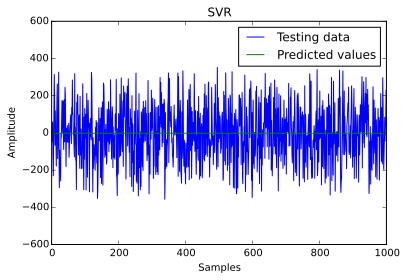

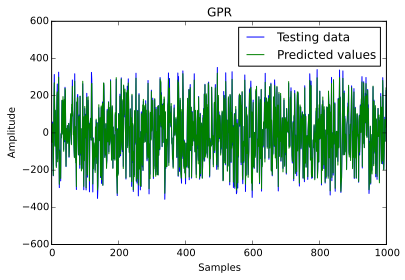

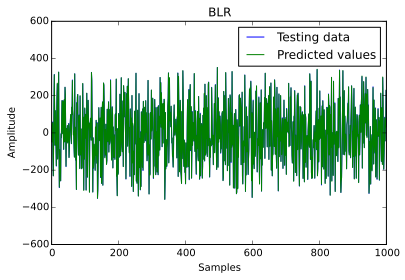

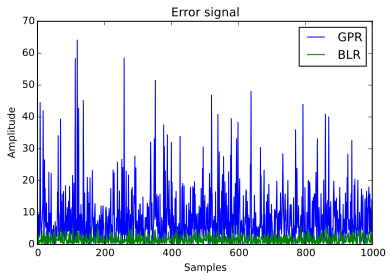

In [14]:
N = x_test.shape[0]

clf_svr.fit(x_train, t_train)
y_svr_test = clf_svr.predict(x_test)
mse_svr_test = (1.0/N)*np.linalg.norm(t_test-y_svr_test)**2
print '[svr] accuracy score: {}'.format(clf_svr.score(x_test, t_test)) 
print '[svr] MSE: {}'.format(mse_svr_test)

clf_gpr.fit(x_train, t_train)
y_gpr_test = clf_gpr.predict(x_test)
mse_gpr_test = (1.0/N)*np.linalg.norm(t_test-y_gpr_test)**2
print '[gpr] accuracy score: {}'.format(clf_gpr.score(x_test, t_test)) 
print '[gpr] MSE: {}'.format(mse_gpr_test)

clf_blr.fit(x_train, t_train)
y_blr_test = clf_blr.predict(x_test)
mse_blr_test = (1.0/N)*np.linalg.norm(t_test-y_blr_test)**2
print '[blr] accuracy score: {}'.format(clf_blr.score(x_test, t_test)) 
print '[blr] MSE: {}'.format(mse_blr_test)

plt.figure()
plt.plot(t_test)
plt.plot(y_svr_test)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('SVR')
plt.legend(['Testing data', 'Predicted values'])
plt.ylim([-600, 600])

plt.figure()
plt.plot(t_test)
plt.plot(y_gpr_test)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('GPR')
plt.legend(['Testing data', 'Predicted values'])
plt.ylim([-600, 600])

plt.figure()
plt.plot(t_test)
plt.plot(y_blr_test)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('BLR')
plt.legend(['Testing data', 'Predicted values'])
plt.ylim([-600, 600])

plt.figure()
plt.plot(np.abs(t_test - y_gpr_test))
plt.plot(np.abs(t_test - y_blr_test))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Error signal')
plt.legend(['GPR', 'BLR'])